In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.ticker as ticker

sns.set_style("whitegrid")
sns.set_palette("muted")

### Loading data

In [2]:
brands = pd.read_csv(r'/Users/deonissx/Documents/Bootcamp/Projects_WBS/Eniac_discount/00_data/01_row/brands.csv')
orderlines = pd.read_csv(r'/Users/deonissx/Documents/Bootcamp/Projects_WBS/Eniac_discount/00_data/01_row/orderlines.csv')
orders = pd.read_csv(r'/Users/deonissx/Documents/Bootcamp/Projects_WBS/Eniac_discount/00_data/01_row/orders.csv')
products = pd.read_csv(r'/Users/deonissx/Documents/Bootcamp/Projects_WBS/Eniac_discount/00_data/01_row/products.csv')

In [3]:
df_brands = brands.copy(deep = True)
df_orderlines = orderlines.copy(deep = True)
df_orders = orders.copy(deep = True)
df_products = products.copy(deep = True)

### Preparing and cleaning Data

### 1. df_brands

In [4]:
df_brands.head(5)

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio


In [5]:
df_brands.info()
df_brands.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


,short,long
count,187,187
unique,187,181
top,8MO,Mophie
freq,1,2


In [6]:
df_brands.duplicated().sum() # 0
df_brands.isna().sum() # 0



short    0
long     0
dtype: int64

### 2. df_orderlines

In [7]:
df_orderlines.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57


In [8]:
df_orderlines.dtypes

id                   int64
id_order             int64
product_id           int64
product_quantity     int64
sku                 object
unit_price          object
date                object
dtype: object

In [9]:
df_orderlines['date'] = pd.to_datetime(df_orderlines['date'], format='mixed').dt.normalize()
print(df_orderlines['date'].head())

0   2017-01-01
1   2017-01-01
2   2017-01-01
3   2017-01-01
4   2017-01-01
Name: date, dtype: datetime64[ns]


In [10]:
df_orderlines.info()
df_orderlines.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  object        
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 15.7+ MB


,id,id_order,product_id,product_quantity,date
count,2.939830e+05,293983.000000,293983.0,293983.000000,293983
mean,1.397918e+06,419999.116544,0.0,1.121126,2017-09-18 13:09:13.464656128
min,1.119109e+06,241319.000000,0.0,1.000000,2017-01-01 00:00:00
25%,1.262542e+06,362258.500000,0.0,1.000000,2017-06-06 00:00:00
50%,1.406940e+06,425956.000000,0.0,1.000000,2017-11-13 00:00:00
75%,1.531322e+06,478657.000000,0.0,1.000000,2018-01-02 00:00:00
max,1.650203e+06,527401.000000,0.0,999.000000,2018-03-14 00:00:00
std,1.530096e+05,66344.486479,0.0,3.396569,NaN


In [11]:
df_orderlines.duplicated().sum() # 0
df_orderlines.isna().sum() # 0
df_orderlines.dtypes


id                           int64
id_order                     int64
product_id                   int64
product_quantity             int64
sku                         object
unit_price                  object
date                datetime64[ns]
dtype: object

In [12]:
df_orderlines.sort_values(by='product_id', ascending=True) # all product_id value is 0
df_orderlines = df_orderlines.drop(columns=['product_id']) # drop it

In [13]:
df_orderlines['unit_price'].str.count("\.").value_counts() # Definition of data type problems

unit_price
1    257814
2     36169
Name: count, dtype: int64

In [14]:
df_orderlines.loc[df_orderlines['unit_price'].str.count('\.') > 1, 'unit_price']

6         1.137.99
11        2.565.99
15        3.278.99
43        2.616.99
59        2.873.99
            ...   
293862    2.999.00
293887    3.497.00
293889    3.075.00
293911    1.329.00
293936    1.329.00
Name: unit_price, Length: 36169, dtype: object

In [15]:
count_of_wrong_values = (df_orderlines['unit_price'].str.count('\.') > 1).sum()

percentage_of_wrong_values = (100 * count_of_wrong_values / df_orderlines.shape[0])
percentage_of_wrong_values #12.3% value has mistake with 2 dots in number

np.float64(12.30309235568043)

In [16]:
df_clean = df_orderlines.copy()

#### Hypothesis testing - trying to safe the data with 2 dots

In [17]:
# We making fix from '1.137.99' to '1137.99'
df_clean['unit_price'] = df_clean['unit_price'].str.replace(r'\.(?=\d+\.)', '', regex=True)

# Then changin format to numeric
df_clean['unit_price'] = pd.to_numeric(df_clean['unit_price'], errors='coerce')

In [18]:
unit_price = df_orderlines.loc[df_orderlines['unit_price'].str.count('\.') > 1]
probles_values = unit_price['id_order'].unique()

In [19]:
len(probles_values)

34642

In [20]:
df_orders.loc[df_orders['order_id'].isin(probles_values), 'total_paid'].sum()

np.float64(89532634.80000001)

In [21]:
merged_df = unit_price.merge(df_products, on='sku')

In [22]:
merged_df = merged_df[['id', 'id_order', 'sku', 'name', 'unit_price', 'price']]

In [23]:
merged_df.sample(5) # first dot is mistake of input the value

,id,id_order,sku,name,unit_price,price
40157,1221210,342824,APP1848,"Apple MacBook Pro 13 ""Core i5 with Touch Bar 3...",2.202.99,2319
65962,1322726,391767,PAC2139,"Apple iMac 27 ""Core i5 Retina 5K 35GHz | 32GB ...",2.620.59,3019
27892,1196634,331422,PAC1065,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 16GB |...",3.456.99,3709
78740,1442274,441522,APP2073,"Apple MacBook Air 13 ""Core i5 18GHz | 8GB RAM ...",1.218.59,1355.59
57475,1260965,361997,PAC1041,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 16GB |...",2.873.99,3169


In [24]:

merged_df['unit_price'] = merged_df['unit_price'].str.replace(r'\.(?=\d+\.)', '', regex=True)
merged_df['unit_price'] = pd.to_numeric(merged_df['unit_price'], errors='raise')

In [25]:
merged_df.sample(5) #clean unit_price

,id,id_order,sku,name,unit_price,price
80899,1451667,445388,PAC2076,"Apple iMac 27 ""Core i5 3.4GHz Retina 5K | 16GB...",2197.59,2459
8054,1142354,307863,APP1197,"Apple iMac 21.5 ""Core i5 31 GHz Retina display...",1612.99,1729
6614,1139457,306613,APP1630,Apple iPhone 7 Plus 128GB Black,1019.00,889
49532,1241157,352474,PAC1059,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 32GB |...",3480.99,4069
2943,1124483,301934,PAC1618,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 32GB R...",3686.99,5089


In [26]:
merged_df['price'] = pd.to_numeric(merged_df['price'], errors='coerce') #fix data type

In [27]:
merged_df['unit_price_dif'] = merged_df['price'] - merged_df['unit_price']

In [28]:
merged_df.sample(5)

,id,id_order,sku,name,unit_price,price,unit_price_dif
76092,1421475,430175,APP2276,"Apple MacBook Pro 13 ""Core i7 Touch Bar 35GHz ...",2475.59,2599.00,123.41
66855,1330893,395574,APP2080,"Apple MacBook Pro 13 ""Core i5 23GHz | 8GB RAM ...",1639.59,1755.59,116.00
15499,1162733,316391,PAC1035,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 32GB |...",3010.99,3649.00,638.01
79250,1444729,442533,APP2265,"Apple MacBook Pro 13 ""Core i7 Touch Bar 35GHz ...",2414.59,2609.00,194.41
67861,1348373,398040,APP2266,"Apple MacBook Pro 13 ""Core i5 3.1GHz Touch Bar...",2371.59,2489.00,117.41


In [29]:
# unit_price_dif in %
merged_df['unit_price_dif_%'] = (
    (merged_df['unit_price'] - merged_df['price']) / merged_df['price']
) * 100

In [30]:
merged_df.sample(5)

,id,id_order,sku,name,unit_price,price,unit_price_dif,unit_price_dif_%
109068,1611327,510478,APP1199,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 8GB ...",2219.14,2329.00,109.86,-4.717046
102639,1580028,498316,PAC0962,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",2199.00,3049.00,850.00,-27.877993
62348,1288456,375426,WAC0216,"Wacom MobileStudio Pro 13 ""i7 256GB",2049.99,2149.90,99.91,-4.647193
103362,1584311,499990,APP0995,"Apple MacBook Pro Retina 15 ""i7 22 Ghz | RAM 1...",2048.59,2255.59,207.00,-9.177200
54905,1255607,359425,APP1853,"Apple MacBook Pro 13 ""with Touch Bar 33GHz Cor...",2658.99,2799.00,140.01,-5.002144


In [31]:
merged_df['unit_price_dif_%'].describe()

count    117662.000000
mean         -9.052705
std         268.381211
min         -54.348012
25%         -14.156362
50%          -7.004709
75%          -5.001830
max       89279.793296
Name: unit_price_dif_%, dtype: float64

In [32]:
df_clean['unit_price'].nlargest()

36979     159989.83
38317      15349.00
282442     14725.00
232052     14580.00
232077     14580.00
Name: unit_price, dtype: float64

In [33]:
# the most expensive products afther cleaning
print(df_clean['unit_price'].sort_values(ascending=False).head(10))

36979     159989.83
38317      15349.00
282442     14725.00
253465     14580.00
232052     14580.00
232077     14580.00
248338     14580.00
255123     14580.00
241912     14580.00
234834     14580.00
Name: unit_price, dtype: float64


In [34]:
# avg price
print(f"Avg price {df_clean['unit_price'].mean()}")

Avg price 409.8551916607422


In [35]:
# total order price
df_clean['total_price'] = df_clean['product_quantity'] * df_clean['unit_price']

# grand total price
grand_total = df_clean['total_price'].sum()
print(f"Total price: {grand_total:.2f}") 

Total price: 128776222.03


In [36]:

dirty_indices = df_orderlines.loc[df_orderlines['unit_price'].str.count('\.') > 1].index
saved_revenue = df_clean.loc[dirty_indices, 'total_price'].sum()

total_revenue = df_clean['total_price'].sum()

print(f"Revenue in rescued data: {saved_revenue:,.2f} €")
print(f"Total revenue of the entire database {total_revenue:,.2f} €")
print(f"Share of rescued revenue: {(saved_revenue / total_revenue) * 100:.2f}%")

Revenue in rescued data: 83,689,221.59 €
Total revenue of the entire database 128,776,222.03 €
Share of rescued revenue: 64.99%


In [37]:
df_clean_orderlines = df_clean.copy()

In [38]:
df_clean_orderlines.sample(5)

,id,id_order,product_quantity,sku,unit_price,date,total_price
35175,1194020,330242,1,APP1210,163.39,2017-02-28,163.39
135774,1386636,416716,1,APP2542,59.00,2017-10-24,59.00
211611,1514297,471133,1,APP2075,6.59,2017-12-25,6.59
247226,1576035,496810,1,WAC0166,69.99,2018-01-23,69.99
143481,1400451,423366,1,APP2072,1005.59,2017-11-08,1005.59


In [39]:
df_clean_orderlines.isna().sum()

id                  0
id_order            0
product_quantity    0
sku                 0
unit_price          0
date                0
total_price         0
dtype: int64

In [40]:
df_clean_orderlines['unit_price'].nlargest()

36979     159989.83
38317      15349.00
282442     14725.00
232052     14580.00
232077     14580.00
Name: unit_price, dtype: float64

### 3. df_orders

In [41]:
df_orders.head(5)

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


In [42]:
df_orders.dtypes

order_id          int64
created_date     object
total_paid      float64
state            object
dtype: object

In [43]:
df_orders['created_date'] = pd.to_datetime(df_orders['created_date'], format='mixed').dt.normalize()
print(df_orders['created_date'].head())

0   2017-01-02
1   2017-11-06
2   2017-12-31
3   2017-02-16
4   2017-11-24
Name: created_date, dtype: datetime64[ns]


In [44]:
df_orders.info()
df_orders.describe()

# total paid miss value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226909 non-null  int64         
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


,order_id,created_date,total_paid
count,226909.000000,226909,226904.000000
mean,413296.482480,2017-09-06 00:37:09.023970048,569.225818
min,241319.000000,2017-01-01 00:00:00,0.000000
25%,356263.000000,2017-05-17 00:00:00,34.190000
50%,413040.000000,2017-10-16 00:00:00,112.990000
75%,470553.000000,2017-12-24 00:00:00,525.980000
max,527401.000000,2018-03-14 00:00:00,214747.530000
std,65919.250331,NaN,1761.778002


In [45]:
#df_orders.duplicated().sum() # 0
df_orders.isna().sum() # 5

order_id        0
created_date    0
total_paid      5
state           0
dtype: int64

In [46]:
df_orders[df_orders['total_paid'].isna()] # 5 NaN values (with Pending state)

,order_id,created_date,total_paid,state
127701,427314,2017-11-20,NaN,Pending
132013,431655,2017-11-22,NaN,Pending
147316,447411,2017-11-27,NaN,Pending
148833,448966,2017-11-27,NaN,Pending
149434,449596,2017-11-27,NaN,Pending


In [47]:
df_orders['state'].value_counts() # Pending - 14.3k but NaN values only 5

# probably NaN values dont related with state column 
# NaN values was old created_date so probably its system mistake

state
Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14379
Cancelled            7233
Name: count, dtype: int64

In [48]:
df_orders = df_orders.dropna(subset=['total_paid'])
print(df_orders['total_paid'].isna().sum())

0


In [49]:
df_orders[df_orders['total_paid'].isna()] 

,order_id,created_date,total_paid,state


In [50]:
df_orders.sample(5)

,order_id,created_date,total_paid,state
25337,324817,2017-02-15,149.99,Shopping Basket
159305,459529,2017-12-11,431.92,Shopping Basket
101972,401557,2017-09-18,44.98,Completed
5857,305326,2017-01-09,4.99,Shopping Basket
124773,424370,2017-11-10,1511.59,Shopping Basket


In [51]:
df_orders.groupby('state')['total_paid'].sum().sort_values(ascending=False)


state
Shopping Basket    85912559.93
Place Order        17087858.32
Completed          15910079.24
Cancelled           5545816.86
Pending             4703300.72
Name: total_paid, dtype: float64

In [52]:
df_orders.loc[df_orders['state'] == 'Shopping Basket', 'total_paid'].sort_values(ascending = False)

96028     214747.53
2478      214746.63
183927    214714.31
61659     214642.47
40557     214517.58
            ...    
209514         0.00
171344         0.00
90096          0.00
90084          0.00
193397         0.00
Name: total_paid, Length: 117809, dtype: float64

---
- 5 NaN values in total_paid was delated

In [53]:
df_orders.duplicated().sum()

np.int64(0)

### 4. df_products

In [54]:
df_products.sample(10)

,sku,name,desc,price,promo_price,in_stock,type
6287,PAC1066,"Apple iMac 27 ""Core i5 3.3GHz Retina 5K | 32GB...",IMac desktop computer 27 inch 5K Retina i5 3.3...,3889,33.099.901,0,"5,74E+15"
1856,TWS0085,Twelve South HiRise Deluxe iPhone and iPad Black,Adjustable Stand for iPhone 5 Lightning / 5C /...,69.99,569.898,0,1216
7429,PAC1618,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 32GB R...",IMac desktop computer 27 inch Retina 5K 4GHz C...,5089,37.509.903,0,"5,74E+15"
389,REP0074,LCD screen repair iPad (1st generation),Repair service including parts and labor for iPad,115.99,1.149.899,0,"1,44E+11"
10044,PAC1589,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 8GB ...",Desktop computer iMac 27-inch 3.2GHz Core i5 5...,2689,24.739.902,0,"5,74E+15"
6263,PAC1066,"Apple iMac 27 ""Core i5 3.3GHz Retina 5K | 32GB...",IMac desktop computer 27 inch 5K Retina i5 3.3...,3889,33.099.901,0,"5,74E+15"
10415,PAC1600,"Apple iMac 27 ""Core i7 Retina 5K 4Ghz | RAM 32...",IMac desktop computer 27 inch Retina 5K 4GHz C...,3769,31.089.897,0,"5,74E+15"
4207,APP1390,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 8GB | ...",IMac desktop computer 27 inch 8GB RAM 512GB Re...,3469,30.855.944,0,"5,74E+15"
15297,SPE0191,"Speck Case SmartShell MacBook Pro 15 ""Touch Ba...",MacBook 15-inch housing Transparent Touch Bar,49.99,399.905,1,13835403
7829,PAC1626,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 8GB RA...",IMac desktop computer 27 inch Retina 5K 4GHz C...,4669,37.989.898,0,"5,74E+15"


In [55]:
df_products.dtypes

sku            object
name           object
desc           object
price          object
promo_price    object
in_stock        int64
type           object
dtype: object

In [56]:
df_products.info()
df_products.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


,in_stock
count,19326.000000
mean,0.109593
std,0.312390
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


--------- 

In [57]:
df_products.duplicated().sum()

np.int64(8746)

In [58]:
df_products.isna().sum()

sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64

### Pre-conclusions of row df_products:

- duplicate - 8746 values (of total value 19326)
- miss values - price(46), type(50), desc(7)
- types error - price, promo_price

In [59]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [60]:
df_products = df_products.drop_duplicates()

In [61]:
df_products.duplicated().sum()

np.int64(0)

In [62]:
df_products.loc[df_products['desc'].isnull()]

,sku,name,desc,price,promo_price,in_stock,type
16126,WDT0211-A,"Open - Purple 2TB WD 35 ""PC Security Mac hard ...",NaN,107,814.659,0,1298
16128,APP1622-A,Open - Apple Smart Keyboard Pro Keyboard Folio...,NaN,1.568.206,1.568.206,0,1298
17843,PAC2334,Synology DS718 + NAS Server | 10GB RAM,NaN,566.35,5.659.896,0,12175397
18152,KAN0034-A,Open - Kanex USB-C Gigabit Ethernet Adapter Ma...,NaN,29.99,237.925,0,1298
18490,HTE0025,Hyper Pearl 1600mAh battery Mini USB Mirror an...,NaN,24.99,22.99,1,1515
18612,OTT0200,OtterBox External Battery Power Pack 20000 mAHr,NaN,79.99,56.99,1,1515
18690,HOW0001-A,Open - Honeywell thermostat Lyric zonificador ...,NaN,199.99,1.441.174,0,11905404


In [63]:
df_products['desc'] = df_products['name']

In [64]:
df_products['price'] = pd.to_numeric(df_products['price'], errors='coerce')
df_products['promo_price'] = pd.to_numeric(df_products['promo_price'], errors='coerce')

In [65]:
df_products.info()
df_products.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10580 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          10580 non-null  object 
 1   name         10580 non-null  object 
 2   desc         10580 non-null  object 
 3   price        10157 non-null  float64
 4   promo_price  5983 non-null   float64
 5   in_stock     10580 non-null  int64  
 6   type         10530 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 661.2+ KB


,price,promo_price,in_stock
count,10157.000000,5983.000000,10580.000000
mean,663.124629,363.244268,0.194140
std,1355.237789,336.827855,0.395556
min,2.990000,2.310000,0.000000
25%,44.900000,149.895000,0.000000
50%,119.000000,299.899000,0.000000
75%,649.891000,499.899000,0.000000
max,15339.000000,9841.990000,1.000000


In [66]:
pd.set_option('display.float.format', lambda x: '%.2f' % x)

In [67]:
brands_clean = df_brands.copy(deep = True)
orderlines_clean = df_clean_orderlines.copy(deep = True)
orders_clean = df_orders.copy(deep = True)
products_clean = df_products.copy(deep = True)


products_clean.isna().sum()

In [68]:
products_clean.loc[products_clean['promo_price'].isna()]

,sku,name,desc,price,promo_price,in_stock,type
50,APP0367,Apple Mini DisplayPort to DVI Adapter Mac dual...,Apple Mini DisplayPort to DVI Adapter Mac dual...,119.00,NaN,0,1325
51,APP0344,"Apple Thunderbolt Display 27 ""Monitor Mac","Apple Thunderbolt Display 27 ""Monitor Mac",1149.00,NaN,0,1296
66,MAK0008,Maclocks theft case iPad 2 3 and 4 black with ...,Maclocks theft case iPad 2 3 and 4 black with ...,120.00,NaN,0,12635403
67,MAK0007,Maclocks theft case iPad 2 3 and 4 transparent...,Maclocks theft case iPad 2 3 and 4 transparent...,120.00,NaN,0,12635403
97,MAK0014,Maclocks safety housing Kiosk iPad 2 3 and 4 b...,Maclocks safety housing Kiosk iPad 2 3 and 4 b...,164.99,NaN,0,1216
...,...,...,...,...,...,...,...
19300,REP0412,Rear Camera Repair iPhone 7 Plus,Rear Camera Repair iPhone 7 Plus,119.99,NaN,0,"1,44E+11"
19317,REP0403,iPad LCD screen repair,iPad LCD screen repair,159.99,NaN,0,"1,44E+11"
19318,REP0402,iPad touch screen repair,iPad touch screen repair,139.99,NaN,0,"1,44E+11"
19319,KNO0032,"Knomo MacBook Pro Beauchamp Backpack 14 ""Black","Knomo MacBook Pro Beauchamp Backpack 14 ""Black",179.00,NaN,1,1392


In [69]:
# products_clean.loc[products_clean['price'].isna()]
products_clean.dropna(subset=['price'], inplace=True)
products_clean.dropna(subset=['type'], inplace=True)

In [70]:
products_clean.info()
products_clean.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 10110 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          10110 non-null  object 
 1   name         10110 non-null  object 
 2   desc         10110 non-null  object 
 3   price        10110 non-null  float64
 4   promo_price  5824 non-null   float64
 5   in_stock     10110 non-null  int64  
 6   type         10110 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 631.9+ KB


sku               0
name              0
desc              0
price             0
promo_price    4286
in_stock          0
type              0
dtype: int64

In [71]:
# we have 4286 Nan values. Should we drop it or recovery?
# I decided try to count the difference between avg price and promo price. 
products_clean.loc[products_clean['promo_price'].isna()]

,sku,name,desc,price,promo_price,in_stock,type
50,APP0367,Apple Mini DisplayPort to DVI Adapter Mac dual...,Apple Mini DisplayPort to DVI Adapter Mac dual...,119.00,NaN,0,1325
51,APP0344,"Apple Thunderbolt Display 27 ""Monitor Mac","Apple Thunderbolt Display 27 ""Monitor Mac",1149.00,NaN,0,1296
66,MAK0008,Maclocks theft case iPad 2 3 and 4 black with ...,Maclocks theft case iPad 2 3 and 4 black with ...,120.00,NaN,0,12635403
67,MAK0007,Maclocks theft case iPad 2 3 and 4 transparent...,Maclocks theft case iPad 2 3 and 4 transparent...,120.00,NaN,0,12635403
97,MAK0014,Maclocks safety housing Kiosk iPad 2 3 and 4 b...,Maclocks safety housing Kiosk iPad 2 3 and 4 b...,164.99,NaN,0,1216
...,...,...,...,...,...,...,...
19300,REP0412,Rear Camera Repair iPhone 7 Plus,Rear Camera Repair iPhone 7 Plus,119.99,NaN,0,"1,44E+11"
19317,REP0403,iPad LCD screen repair,iPad LCD screen repair,159.99,NaN,0,"1,44E+11"
19318,REP0402,iPad touch screen repair,iPad touch screen repair,139.99,NaN,0,"1,44E+11"
19319,KNO0032,"Knomo MacBook Pro Beauchamp Backpack 14 ""Black","Knomo MacBook Pro Beauchamp Backpack 14 ""Black",179.00,NaN,1,1392


In [72]:
price_m = products_clean.groupby('name')['price'].mean()
promo_pm = products_clean.groupby('name')['promo_price'].mean()

In [73]:
products_valid = products_clean.loc[products_clean['promo_price'] <= products_clean['price']]

price_m = products_valid.groupby('name')['price'].mean()
promo_pm = products_valid.groupby('name')['promo_price'].mean()

diff_by_name = (price_m - promo_pm)

diff_by_name.mean()

np.float64(51.455960831334934)

In [74]:

products_clean.loc[products_clean['promo_price'] > products_clean['price'], 'promo_price'] = np.nan

In [75]:
# avg discount %

discount_percent = 100 - (promo_pm / price_m * 100)
discount_percent.mean()

np.float64(18.54815801417053)

In [76]:
products_clean.drop(columns='promo_price', inplace= True)


In [77]:
#products_clean.drop(columns='price_diff', inplace= True)

In [78]:
products_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10110 entries, 0 to 19325
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       10110 non-null  object 
 1   name      10110 non-null  object 
 2   desc      10110 non-null  object 
 3   price     10110 non-null  float64
 4   in_stock  10110 non-null  int64  
 5   type      10110 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 552.9+ KB


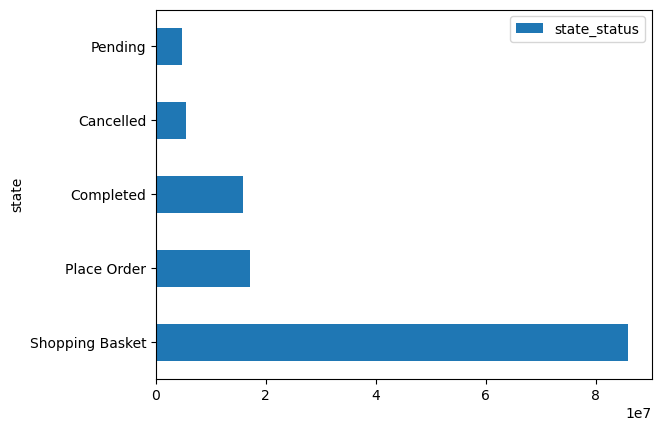

In [79]:
order_by_state = (
    orders_clean
    .groupby('state')
    .agg(
        state_status = ('total_paid', 'sum')
    )
    .sort_values('state_status',ascending = False)
)


order_by_state.plot.barh();


In [80]:
orders_completed = orders_clean.loc[orders_clean['state'] == 'Completed']

In [81]:
orders_completed.shape, orders_completed.order_id.nunique()

((46605, 4), 46605)

In [82]:
orderlines_clean.id_order.nunique()

204855

In [83]:
orders_clean.order_id.nunique()

226904

In [84]:
order_set = set(orders_completed['order_id'])

In [85]:
orderlines_set = set(orderlines_clean['id_order'].unique())

In [86]:
common_order_ids = order_set.intersection(orderlines_set)

In [87]:
orders_clean = orders_clean.loc[orders_clean['order_id'].isin(common_order_ids)]

In [88]:
orderlines_clean = orderlines_clean.loc[orderlines_clean['id_order'].isin(common_order_ids), :]

In [89]:
orders_clean['order_id'].nunique(), orderlines_clean['id_order'].nunique()

(46560, 46560)

In [90]:
orderlines_clean['id_order'].sort_values().unique() == orders_clean['order_id'].sort_values()

1         True
2         True
3         True
5         True
6         True
          ... 
226549    True
226577    True
226581    True
226603    True
226619    True
Name: order_id, Length: 46560, dtype: bool

### Looking for a outlines

#### Looking for insights

In [91]:
products_clean.info()
products_clean.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10110 entries, 0 to 19325
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       10110 non-null  object 
 1   name      10110 non-null  object 
 2   desc      10110 non-null  object 
 3   price     10110 non-null  float64
 4   in_stock  10110 non-null  int64  
 5   type      10110 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 552.9+ KB


,price,in_stock
count,10110.00,10110.00
mean,662.88,0.20
std,1358.05,0.40
min,2.99,0.00
25%,44.90,0.00
50%,118.99,0.00
75%,640.72,0.00
max,15339.00,1.00


In [92]:
orderlines_clean.info()
orderlines_clean.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 62103 entries, 7 to 293661
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                62103 non-null  int64         
 1   id_order          62103 non-null  int64         
 2   product_quantity  62103 non-null  int64         
 3   sku               62103 non-null  object        
 4   unit_price        62103 non-null  float64       
 5   date              62103 non-null  datetime64[ns]
 6   total_price       62103 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 3.8+ MB


,id,id_order,product_quantity,unit_price,date,total_price
count,62103.00,62103.00,62103.00,62103.00,62103,62103.00
mean,1385896.03,414476.58,1.12,239.90,2017-09-11 06:17:26.558137088,252.96
min,1119116.00,241423.00,1.00,0.00,2017-01-01 00:00:00,0.00
25%,1265837.00,362802.50,1.00,28.99,2017-06-11 00:00:00,29.99
50%,1389566.00,417225.00,1.00,69.99,2017-10-26 00:00:00,75.99
75%,1513594.50,470008.50,1.00,185.79,2017-12-24 00:00:00,206.99
max,1649593.00,527112.00,72.00,8287.80,2018-03-14 00:00:00,13387.77
std,150516.13,65428.74,0.78,501.95,NaN,524.95


In [93]:
orders_clean.info()
orders_clean.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 46560 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      46560 non-null  int64         
 1   created_date  46560 non-null  datetime64[ns]
 2   total_paid    46560 non-null  float64       
 3   state         46560 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.8+ MB


,order_id,created_date,total_paid
count,46560.00,46560,46560.00
mean,415071.69,2017-09-11 22:04:38.350515456,341.65
min,241423.00,2017-01-01 00:00:00,0.00
25%,362810.50,2017-06-09 00:00:00,50.98
50%,417949.00,2017-10-28 00:00:00,113.62
75%,471015.00,2017-12-26 00:00:00,333.99
max,527112.00,2018-03-14 00:00:00,13387.78
std,65791.87,NaN,625.76


#### products_clean - outlines

<Axes: >

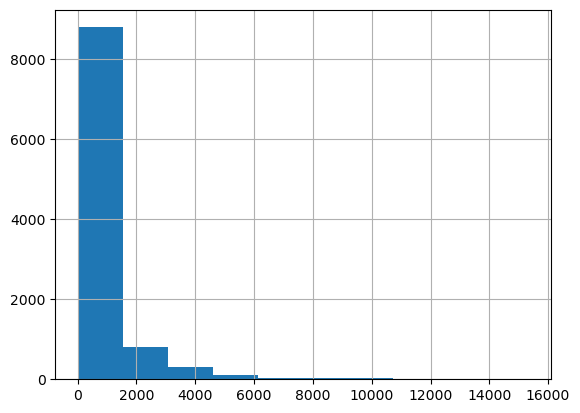

In [94]:
products_clean['price'].hist()

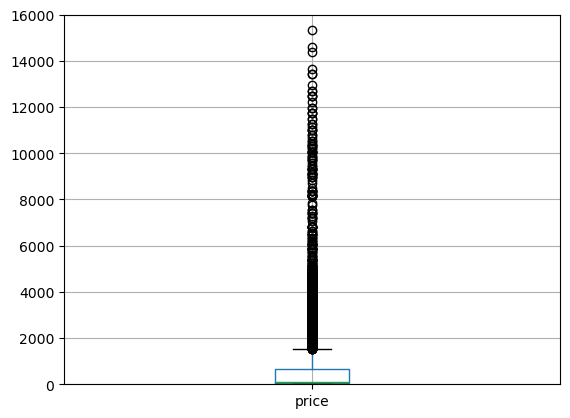

In [95]:
ax = products_clean.boxplot('price');
ax.set_ylim(0, 16000)
plt.show()

In [96]:
# products_clean has no outlines, its premium products of apple
products_clean.loc[products_clean['price'] > 10000].sort_values(by = 'price', ascending=False).head(5)

,sku,name,desc,price,in_stock,type
18429,APP2660,"Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz ...","Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz ...",15339.00,0,118692158
18465,APP2696,"Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz ...","Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz ...",14619.00,0,118692158
18428,APP2659,"Apple iMac Pro 27 ""14-core Intel Xeon W 25GHz ...","Apple iMac Pro 27 ""14-core Intel Xeon W 25GHz ...",14379.00,0,118692158
18464,APP2695,"Apple iMac Pro 27 ""14-core Intel Xeon W 25GHz ...","Apple iMac Pro 27 ""14-core Intel Xeon W 25GHz ...",13659.00,0,118692158
18425,APP2656,"Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz ...","Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz ...",13419.00,0,118692158


#### orderlines_clean - outlines

In [97]:
orderlines_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62103 entries, 7 to 293661
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                62103 non-null  int64         
 1   id_order          62103 non-null  int64         
 2   product_quantity  62103 non-null  int64         
 3   sku               62103 non-null  object        
 4   unit_price        62103 non-null  float64       
 5   date              62103 non-null  datetime64[ns]
 6   total_price       62103 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 3.8+ MB


<Axes: >

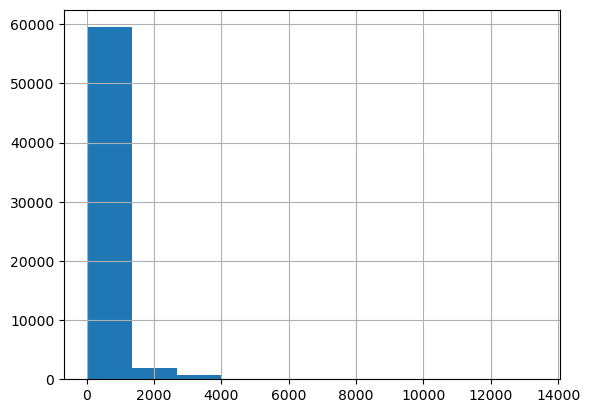

In [98]:
orderlines_clean['total_price'].hist()

In [99]:
orderlines_clean['total_price'].nlargest()

174052   13387.77
170927    8287.80
155065    7955.18
46278     7952.97
122992    7335.59
Name: total_price, dtype: float64

In [100]:
orderlines_clean.loc[orderlines_clean['unit_price'] > 8000, :]

,id,id_order,product_quantity,sku,unit_price,date,total_price
170927,1451975,445507,1,LAC0223,8287.80,2017-11-26,8287.80


In [101]:
#real price, data is ok
products_clean.loc[products_clean['sku'] == 'LAC0223', :].head(5)

,sku,name,desc,price,in_stock,type
14477,LAC0223,12big LaCie Hard Disk 120TB RAID Thunderbolt 3...,12big LaCie Hard Disk 120TB RAID Thunderbolt 3...,9799.00,0,11935397


In [102]:
bad_skus = products_clean.loc[products_clean['type'] == '21632158', 'sku']

# We leave only those lines whose SKUs are NOT included in the list of bad ones
orderlines_clean = orderlines_clean.loc[~orderlines_clean['sku'].isin(bad_skus)].copy()

In [103]:
# 1. Find the order IDs of the orders that contained the bad SKUs (before they were removed from orderlines)
# Or use the original df_orderlines before filtering:
bad_order_ids = df_orderlines.loc[df_orderlines['sku'].isin(bad_skus), 'id_order'].unique()

# 2. Delete these orders from the main orders table.
orders_clean = orders_clean.loc[~orders_clean['order_id'].isin(bad_order_ids)].copy()

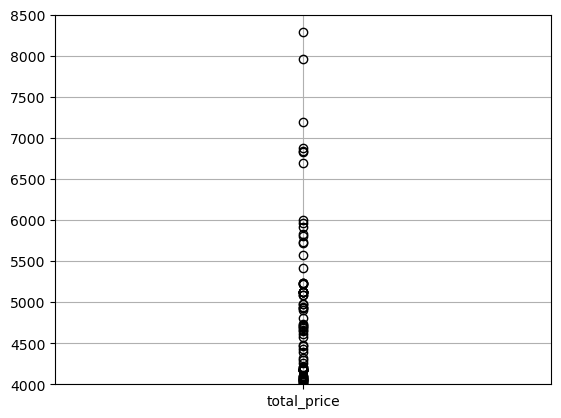

In [104]:

ax = orderlines_clean.boxplot('total_price');
ax.set_ylim(4000, +8500)
plt.show()

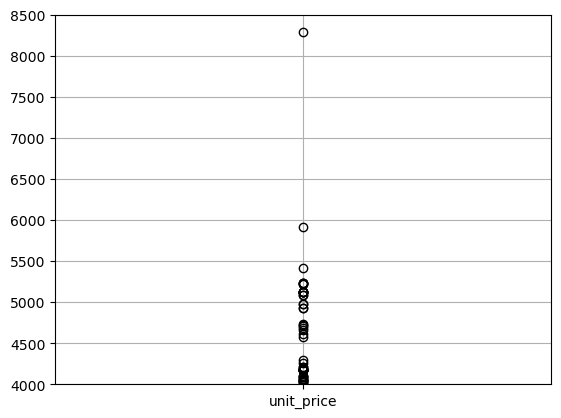

In [105]:

ax = orderlines_clean.boxplot('unit_price');
ax.set_ylim(4000, +8500)
plt.show()

#### orders_clean - outlines

<Axes: >

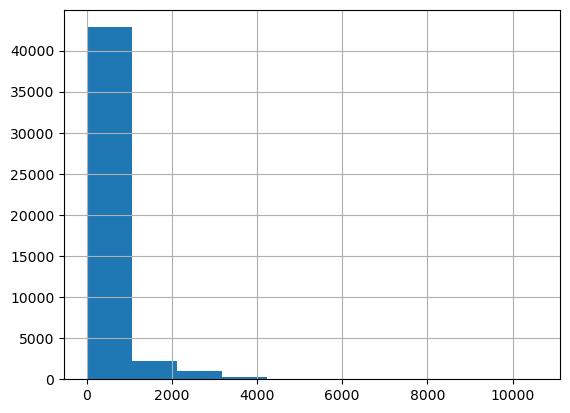

In [106]:
orders_clean['total_paid'].hist()


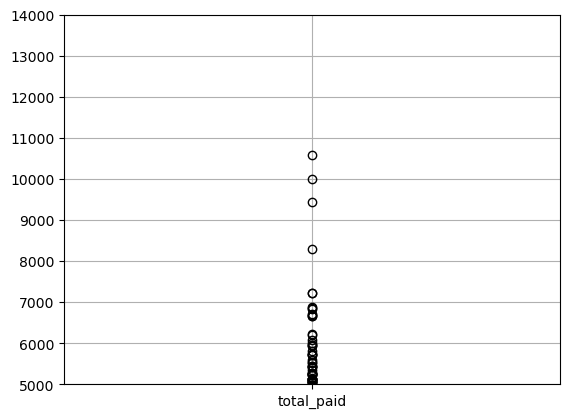

In [107]:
# Удалить дороже 8к?
ax = orders_clean.boxplot('total_paid');
ax.set_ylim(5000, +14000)
plt.show()

In [108]:
orders_clean.loc[orders_clean['total_paid'] > 8000].sort_values(by = 'total_paid', ascending=False)

,order_id,created_date,total_paid,state
95399,394981,2017-08-31,10586.97,Completed
40247,339735,2017-03-27,9987.76,Completed
34178,333662,2017-04-12,9423.90,Completed
145412,445507,2017-11-26,8287.80,Completed


In [109]:
orders_clean.describe()

,order_id,created_date,total_paid
count,46534.00,46534,46534.00
mean,415066.92,2017-09-11 21:39:58.401168896,338.96
min,241423.00,2017-01-01 00:00:00,0.00
25%,362797.00,2017-06-09 00:00:00,50.98
50%,417945.00,2017-10-28 00:00:00,113.34
75%,471031.00,2017-12-26 00:00:00,333.07
max,527112.00,2018-03-14 00:00:00,10586.97
std,65800.70,NaN,613.40


In [110]:
# order_clean has no outlines, its premium products
orderlines_clean.loc[orderlines_clean['id_order'].isin([448053, 394981, 339735, 333662, 433435, 445507]), :].sort_values(by = 'total_price', ascending = False)

,id,id_order,product_quantity,sku,unit_price,date,total_price
170927,1451975,445507,1,LAC0223,8287.80,2017-11-26,8287.80
46278,1214691,339735,3,PAC0968,2650.99,2017-03-27,7952.97
110814,1329583,394981,3,APP2365,1905.59,2017-08-31,5716.77
52424,1225689,333662,1,PAC1628,4049.99,2017-04-10,4049.99
52419,1225677,333662,1,APP1876,3836.99,2017-04-10,3836.99
110818,1329590,394981,1,APP2264,2713.59,2017-08-31,2713.59
110806,1329562,394981,1,PAC2136,2156.59,2017-08-31,2156.59
46289,1214703,339735,1,APP1209,1112.99,2017-03-27,1112.99
155066,1425163,433435,4,DLL0012,203.00,2017-11-23,812.00
52425,1225691,333662,1,BOS0037,599.00,2017-04-10,599.00


## Analysing

### Category of products creations

In [111]:
product_category_df = products_clean.copy()

In [112]:
# We have a product type, so we'll segment by that data. In other cases, we'll use the regex approach.
product_category_df.groupby('type').count().nlargest(20, 'sku')

,sku,name,desc,price,in_stock
type,,,,,
11865403,1061,1061,1061,1061,1061
12175397,941,941,941,941,941
1298,820,820,820,820,820
11935397,565,565,565,565,565
11905404,464,464,464,464,464
1282,373,373,373,373,373
12635403,367,367,367,367,367
13835403,269,269,269,269,269
"5,74E+15",247,247,247,247,247


In [113]:
product_category_df['category'] = ''
product_category_df

,sku,name,desc,price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Silver Rain Design mStand Support,59.99,1,8696,
1,APP0023,Apple Mac Keyboard Keypad Spanish,Apple Mac Keyboard Keypad Spanish,59.00,0,13855401,
2,APP0025,Mighty Mouse Apple Mouse for Mac,Mighty Mouse Apple Mouse for Mac,59.00,0,1387,
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,Apple Dock to USB Cable iPhone and iPod white,25.00,0,1230,
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,34.99,1,1364,
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,Belkin Travel Support Apple Watch Black,29.99,1,12282,
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black","Enroute Thule 14L Backpack MacBook 13 ""Black",69.95,1,1392,
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue","Enroute Thule 14L Backpack MacBook 13 ""Blue",69.95,1,1392,
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red","Enroute Thule 14L Backpack MacBook 13 ""Red",69.95,0,1392,


In [114]:
category_map = {
    11865403: 'smartphones accessories',
    12175397: 'desktop components',
    11935397: 'desktop components',
    11905404: 'lifestyle and smart home',
    1282: 'desktop',
    12635403: 'tablеt accessories',
    13835403: 'desktop components',
    #5,74E+15: 'desktop', - we segment with a separate request
    1364: 'desktop components',
    12585395: 'desktop components',
    1296: 'desktop',
    1325: 'desktop components',
    5384: 'accessories',
    1433: 'desktop components',
    12215397: 'desktop components',
    5398: 'accessories',
    #1,44E+11: 'smartphones accessories', - we segment with a separate request
    57445397: 'desktop components',
    #1,02E+12: 'desktop' - we segment with a separate request
}

In [115]:
product_category_df = product_category_df.replace('', np.nan)
product_category_df['category'] = product_category_df['category'].fillna('Other')

for k, v in category_map.items():
    product_category_df.loc[product_category_df['type'] == k, 'category'] = v

/var/folders/ld/zlrq68p13rldbm4_t4_3yhkr0000gn/T/ipykernel_51243/677285262.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  product_category_df = product_category_df.replace('', np.nan)


In [116]:
# cleaning segmentation
product_category_df.loc[(product_category_df["name"].str.contains("^.{0,7}apple iphone", case=False)), 'category'] = 'smartphone'
product_category_df.loc[product_category_df["name"].str.contains("keyboard", case=False), 'category'] = 'accessories'
product_category_df.loc[product_category_df["name"].str.contains("imac|mac mini|mac pro", case=False), "category"] = "desktop"
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple ipod", case=False), "category"] = "tablet"
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple ipad | tablet", case=False), "category"] = "tablet"
product_category_df.loc[(product_category_df["name"].str.contains(r"apple imac 27", case=False)), 'category'] = 'desktop'
product_category_df.loc[(product_category_df["name"].str.contains(r"repair", case=False)), 'category'] = 'smartphones accessories'
product_category_df.loc[(product_category_df["name"].str.contains(r"Apple MacBook Pro", case=False)), 'category'] = 'desktop'
product_category_df.loc[(product_category_df["name"].str.contains(r"Mouse", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"headset", case=False)), 'category'] = 'accessories'
product_category_df.loc[(product_category_df["name"].str.contains(r"Hard Disk", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"Backpack", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"plata", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"Cable", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"Seagate", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"Apple MacBook Air", case=False)), 'category'] = 'desktop'
product_category_df.loc[(product_category_df["name"].str.contains(r"SSD", case=False)), 'category'] = 'desktop'
product_category_df.loc[(product_category_df["name"].str.contains(r"Book", case=False)), 'category'] = 'tablet'
product_category_df.loc[(product_category_df["name"].str.contains(r"Case", case=False)), 'category'] = 'smartphones accessories'
product_category_df.loc[(product_category_df["name"].str.contains(r"Ports", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"Kingston", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"Apple Watch", case=False)), 'category'] = 'accessories'
product_category_df.loc[(product_category_df["name"].str.contains(r"Monitor", case=False)), 'category'] = 'desktop'
product_category_df.loc[(product_category_df["name"].str.contains(r"Hard Drive", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"WiFi", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"server", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"Ethernet", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"USB", case=False)), 'category'] = 'desktop components'

product_category_df['category'].value_counts()

category
Other                      2992
desktop components         2283
smartphones accessories    1871
desktop                    1256
tablet                     1165
accessories                 422
smartphone                  121
Name: count, dtype: int64

In [117]:
summary_table = product_category_df.groupby('category').agg(
    count=('price', 'count'),
    total_revenue=('price', 'sum')
)
summary_table['count_%'] = (summary_table['count'] / summary_table['count'].sum() * 100).round(2)
summary_table['revenue_%'] = (summary_table['total_revenue'] / summary_table['total_revenue'].sum() * 100).round(2)
summary_table = summary_table.sort_values(by='total_revenue', ascending=False)

display(summary_table)

,count,total_revenue,count_%,revenue_%
category,,,,
desktop,1256,2854428.73,12.42,42.59
tablet,1165,1367870.90,11.52,20.41
desktop components,2283,1212564.93,22.58,18.09
Other,2992,957709.76,29.59,14.29
smartphones accessories,1871,125419.09,18.51,1.87
accessories,422,92775.23,4.17,1.38
smartphone,121,90988.29,1.20,1.36


In [118]:
total_price_cat = product_category_df['price'].sum()
total_price_cat

np.float64(6701756.938)

In [119]:

other_price_cat = product_category_df.loc[product_category_df['category'] == 'Other', 'price'].sum()
other_price_cat

np.float64(957709.7599999999)

In [120]:
# Segmentation is applied to more than 80% of the total cost of items
diff_price_cat = 100 - ((other_price_cat/total_price_cat) * 100)
diff_price_cat

np.float64(85.70957185018696)

### Creating Master_df

In [121]:
products_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10110 entries, 0 to 19325
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       10110 non-null  object 
 1   name      10110 non-null  object 
 2   desc      10110 non-null  object 
 3   price     10110 non-null  float64
 4   in_stock  10110 non-null  int64  
 5   type      10110 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 552.9+ KB


In [122]:
brands_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [123]:
orders_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46534 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      46534 non-null  int64         
 1   created_date  46534 non-null  datetime64[ns]
 2   total_paid    46534 non-null  float64       
 3   state         46534 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.8+ MB


In [124]:
orderlines_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62077 entries, 7 to 293661
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                62077 non-null  int64         
 1   id_order          62077 non-null  int64         
 2   product_quantity  62077 non-null  int64         
 3   sku               62077 non-null  object        
 4   unit_price        62077 non-null  float64       
 5   date              62077 non-null  datetime64[ns]
 6   total_price       62077 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 3.8+ MB


In [125]:
master_df = (
    orders_clean.merge(orderlines_clean, left_on='order_id', right_on='id_order', how='inner')
    .merge(products_clean[['sku', 'name', 'type']], on='sku', how='left')
)

In [126]:
master_df['short'] = master_df['sku'].str[:3]
master_df

,order_id,created_date,total_paid,state,id,id_order,product_quantity,sku,unit_price,date,total_price,name,type,short
0,241423,2017-11-06,136.15,Completed,1398738,241423,1,LAC0212,129.16,2017-11-06,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,11935397,LAC
1,242832,2017-12-31,15.76,Completed,1529178,242832,1,PAR0074,10.77,2017-12-31,10.77,Parrot 550mAh battery for MiniDrones,11905404,PAR
2,243330,2017-02-16,84.98,Completed,1181923,243330,1,OWC0074,77.99,2017-02-15,77.99,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1364,OWC
3,245275,2017-06-28,149.00,Completed,1276706,245275,1,TAD0007,149.00,2017-06-28,149.00,Tado Smart Climate Control Intelligent AC,11905404,TAD
4,245595,2017-01-21,112.97,Completed,1154394,245595,2,PAC1561,52.99,2017-01-21,105.98,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",11935397,PAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62036,527042,2018-03-14,18.98,Completed,1649446,527042,1,APP0927,13.99,2018-03-14,13.99,EarPods Apple Headphones with Remote and Mic (...,5384,APP
62037,527070,2018-03-14,24.97,Completed,1649512,527070,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP
62038,527074,2018-03-14,24.97,Completed,1649522,527074,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP
62039,527096,2018-03-14,34.96,Completed,1649565,527096,3,APP0698,9.99,2018-03-14,29.97,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP


In [127]:
master_df = master_df.merge(brands_clean, on = 'short', how = 'left')
master_df

,order_id,created_date,total_paid,state,id,id_order,product_quantity,sku,unit_price,date,total_price,name,type,short,long
0,241423,2017-11-06,136.15,Completed,1398738,241423,1,LAC0212,129.16,2017-11-06,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,11935397,LAC,LaCie
1,242832,2017-12-31,15.76,Completed,1529178,242832,1,PAR0074,10.77,2017-12-31,10.77,Parrot 550mAh battery for MiniDrones,11905404,PAR,Parrot
2,243330,2017-02-16,84.98,Completed,1181923,243330,1,OWC0074,77.99,2017-02-15,77.99,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1364,OWC,OWC
3,245275,2017-06-28,149.00,Completed,1276706,245275,1,TAD0007,149.00,2017-06-28,149.00,Tado Smart Climate Control Intelligent AC,11905404,TAD,Tado
4,245595,2017-01-21,112.97,Completed,1154394,245595,2,PAC1561,52.99,2017-01-21,105.98,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",11935397,PAC,Pack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62036,527042,2018-03-14,18.98,Completed,1649446,527042,1,APP0927,13.99,2018-03-14,13.99,EarPods Apple Headphones with Remote and Mic (...,5384,APP,Apple
62037,527070,2018-03-14,24.97,Completed,1649512,527070,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple
62038,527074,2018-03-14,24.97,Completed,1649522,527074,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple
62039,527096,2018-03-14,34.96,Completed,1649565,527096,3,APP0698,9.99,2018-03-14,29.97,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple


In [128]:
master_df = master_df.drop(columns=['id_order', 'created_date', 'total_paid', 'id'])
master_df

,order_id,state,product_quantity,sku,unit_price,date,total_price,name,type,short,long
0,241423,Completed,1,LAC0212,129.16,2017-11-06,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,11935397,LAC,LaCie
1,242832,Completed,1,PAR0074,10.77,2017-12-31,10.77,Parrot 550mAh battery for MiniDrones,11905404,PAR,Parrot
2,243330,Completed,1,OWC0074,77.99,2017-02-15,77.99,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1364,OWC,OWC
3,245275,Completed,1,TAD0007,149.00,2017-06-28,149.00,Tado Smart Climate Control Intelligent AC,11905404,TAD,Tado
4,245595,Completed,2,PAC1561,52.99,2017-01-21,105.98,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",11935397,PAC,Pack
...,...,...,...,...,...,...,...,...,...,...,...
62036,527042,Completed,1,APP0927,13.99,2018-03-14,13.99,EarPods Apple Headphones with Remote and Mic (...,5384,APP,Apple
62037,527070,Completed,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple
62038,527074,Completed,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple
62039,527096,Completed,3,APP0698,9.99,2018-03-14,29.97,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple


In [129]:
master_df = master_df.merge(product_category_df[['category', 'in_stock', 'sku']], on = 'sku', how = 'left' )
master_df

,order_id,state,product_quantity,sku,unit_price,date,total_price,name,type,short,long,category,in_stock
0,241423,Completed,1,LAC0212,129.16,2017-11-06,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,11935397,LAC,LaCie,desktop components,1.00
1,242832,Completed,1,PAR0074,10.77,2017-12-31,10.77,Parrot 550mAh battery for MiniDrones,11905404,PAR,Parrot,Other,0.00
2,243330,Completed,1,OWC0074,77.99,2017-02-15,77.99,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1364,OWC,OWC,Other,1.00
3,245275,Completed,1,TAD0007,149.00,2017-06-28,149.00,Tado Smart Climate Control Intelligent AC,11905404,TAD,Tado,Other,0.00
4,245595,Completed,2,PAC1561,52.99,2017-01-21,105.98,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",11935397,PAC,Pack,desktop components,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62036,527042,Completed,1,APP0927,13.99,2018-03-14,13.99,EarPods Apple Headphones with Remote and Mic (...,5384,APP,Apple,Other,1.00
62037,527070,Completed,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple,desktop components,1.00
62038,527074,Completed,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple,desktop components,1.00
62039,527096,Completed,3,APP0698,9.99,2018-03-14,29.97,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple,desktop components,1.00


In [130]:
master_df.info()
master_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62041 entries, 0 to 62040
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          62041 non-null  int64         
 1   state             62041 non-null  object        
 2   product_quantity  62041 non-null  int64         
 3   sku               62041 non-null  object        
 4   unit_price        62041 non-null  float64       
 5   date              62041 non-null  datetime64[ns]
 6   total_price       62041 non-null  float64       
 7   name              60839 non-null  object        
 8   type              60839 non-null  object        
 9   short             62041 non-null  object        
 10  long              62003 non-null  object        
 11  category          60839 non-null  object        
 12  in_stock          60839 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 6.2+ MB


,order_id,product_quantity,unit_price,date,total_price,in_stock
count,62041.00,62041.00,62041.00,62041,62041.00,60839.00
mean,414475.79,1.12,238.20,2017-09-11 05:55:53.156783360,251.06,0.56
min,241423.00,1.00,0.00,2017-01-01 00:00:00,0.00,0.00
25%,362790.00,1.00,28.99,2017-06-11 00:00:00,29.99,0.00
50%,417252.00,1.00,69.99,2017-10-26 00:00:00,75.99,1.00
75%,470029.00,1.00,185.07,2017-12-24 00:00:00,205.99,1.00
max,527112.00,72.00,8287.80,2018-03-14 00:00:00,8287.80,1.00
std,65444.37,0.78,494.75,NaN,515.00,0.50


In [131]:
master_df = master_df.dropna()
master_df

,order_id,state,product_quantity,sku,unit_price,date,total_price,name,type,short,long,category,in_stock
0,241423,Completed,1,LAC0212,129.16,2017-11-06,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,11935397,LAC,LaCie,desktop components,1.00
1,242832,Completed,1,PAR0074,10.77,2017-12-31,10.77,Parrot 550mAh battery for MiniDrones,11905404,PAR,Parrot,Other,0.00
2,243330,Completed,1,OWC0074,77.99,2017-02-15,77.99,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1364,OWC,OWC,Other,1.00
3,245275,Completed,1,TAD0007,149.00,2017-06-28,149.00,Tado Smart Climate Control Intelligent AC,11905404,TAD,Tado,Other,0.00
4,245595,Completed,2,PAC1561,52.99,2017-01-21,105.98,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",11935397,PAC,Pack,desktop components,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62036,527042,Completed,1,APP0927,13.99,2018-03-14,13.99,EarPods Apple Headphones with Remote and Mic (...,5384,APP,Apple,Other,1.00
62037,527070,Completed,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple,desktop components,1.00
62038,527074,Completed,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple,desktop components,1.00
62039,527096,Completed,3,APP0698,9.99,2018-03-14,29.97,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple,desktop components,1.00


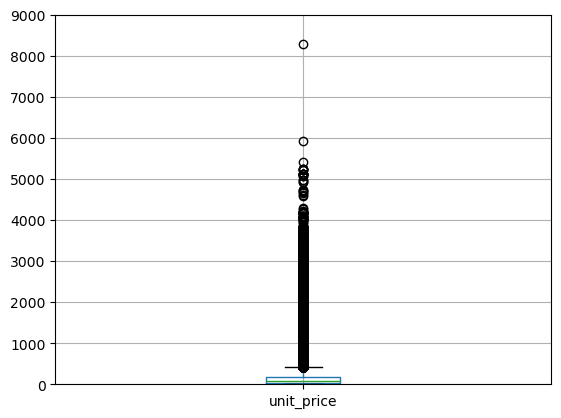

In [132]:
ax = master_df.boxplot('unit_price');
ax.set_ylim(0, +9000)
plt.show()

In [133]:
master_df = master_df.drop(columns='in_stock')
master_df

,order_id,state,product_quantity,sku,unit_price,date,total_price,name,type,short,long,category
0,241423,Completed,1,LAC0212,129.16,2017-11-06,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,11935397,LAC,LaCie,desktop components
1,242832,Completed,1,PAR0074,10.77,2017-12-31,10.77,Parrot 550mAh battery for MiniDrones,11905404,PAR,Parrot,Other
2,243330,Completed,1,OWC0074,77.99,2017-02-15,77.99,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1364,OWC,OWC,Other
3,245275,Completed,1,TAD0007,149.00,2017-06-28,149.00,Tado Smart Climate Control Intelligent AC,11905404,TAD,Tado,Other
4,245595,Completed,2,PAC1561,52.99,2017-01-21,105.98,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",11935397,PAC,Pack,desktop components
...,...,...,...,...,...,...,...,...,...,...,...,...
62036,527042,Completed,1,APP0927,13.99,2018-03-14,13.99,EarPods Apple Headphones with Remote and Mic (...,5384,APP,Apple,Other
62037,527070,Completed,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple,desktop components
62038,527074,Completed,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple,desktop components
62039,527096,Completed,3,APP0698,9.99,2018-03-14,29.97,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple,desktop components


In [158]:
new_order = ['order_id', 'date', 'sku', 'name', 'product_quantity', 'unit_price', 'total_price', 'state', 'category', 'long',  'short', 'type'] 

master_df = master_df[new_order]
master_df

,order_id,date,sku,name,product_quantity,unit_price,total_price,state,category,long,short,type
0,241423,2017-11-06,LAC0212,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,1,129.16,129.16,Completed,desktop components,LaCie,LAC,11935397
1,242832,2017-12-31,PAR0074,Parrot 550mAh battery for MiniDrones,1,10.77,10.77,Completed,Other,Parrot,PAR,11905404
2,243330,2017-02-15,OWC0074,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1,77.99,77.99,Completed,Other,OWC,OWC,1364
3,245275,2017-06-28,TAD0007,Tado Smart Climate Control Intelligent AC,1,149.00,149.00,Completed,Other,Tado,TAD,11905404
4,245595,2017-01-21,PAC1561,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",2,52.99,105.98,Completed,desktop components,Pack,PAC,11935397
...,...,...,...,...,...,...,...,...,...,...,...,...
60798,527042,2018-03-14,APP0927,EarPods Apple Headphones with Remote and Mic (...,1,13.99,13.99,Completed,Other,Apple,APP,5384
60799,527070,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2,9.99,19.98,Completed,desktop components,Apple,APP,1230
60800,527074,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2,9.99,19.98,Completed,desktop components,Apple,APP,1230
60801,527096,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,3,9.99,29.97,Completed,desktop components,Apple,APP,1230


In [149]:
products_clean

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Silver Rain Design mStand Support,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,Apple Mac Keyboard Keypad Spanish,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,Mighty Mouse Apple Mouse for Mac,59.00,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,Apple Dock to USB Cable iPhone and iPod white,25.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,34.99,1,1364
...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,Belkin Travel Support Apple Watch Black,29.99,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black","Enroute Thule 14L Backpack MacBook 13 ""Black",69.95,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue","Enroute Thule 14L Backpack MacBook 13 ""Blue",69.95,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red","Enroute Thule 14L Backpack MacBook 13 ""Red",69.95,0,1392


In [166]:
#смерджить продукт с обычной ценой
#создать колонку дисконт тру или офлс

master_df = master_df.merge(products_clean[['sku', 'price']], 
                            on='sku', 
                            how='left')
master_df

MergeError: Passing 'suffixes' which cause duplicate columns {'price_x'} is not allowed.

In [167]:
new_order2 = ['order_id', 'date', 'sku', 'name', 'product_quantity', 'price' ,'unit_price', 'total_price', 'state', 'category', 'long',  'short', 'type'] 

master_df = master_df[new_order2]
master_df

,order_id,date,sku,name,product_quantity,price,unit_price,total_price,state,category,long,short,type
0,241423,2017-11-06,LAC0212,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,1,139.99,129.16,129.16,Completed,desktop components,LaCie,LAC,11935397
1,242832,2017-12-31,PAR0074,Parrot 550mAh battery for MiniDrones,1,17.99,10.77,10.77,Completed,Other,Parrot,PAR,11905404
2,243330,2017-02-15,OWC0074,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1,99.99,77.99,77.99,Completed,Other,OWC,OWC,1364
3,245275,2017-06-28,TAD0007,Tado Smart Climate Control Intelligent AC,1,179.00,149.00,149.00,Completed,Other,Tado,TAD,11905404
4,245595,2017-01-21,PAC1561,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",2,103.95,52.99,105.98,Completed,desktop components,Pack,PAC,11935397
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60798,527042,2018-03-14,APP0927,EarPods Apple Headphones with Remote and Mic (...,1,35.00,13.99,13.99,Completed,Other,Apple,APP,5384
60799,527070,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2,25.00,9.99,19.98,Completed,desktop components,Apple,APP,1230
60800,527074,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2,25.00,9.99,19.98,Completed,desktop components,Apple,APP,1230
60801,527096,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,3,25.00,9.99,29.97,Completed,desktop components,Apple,APP,1230


In [ ]:
master_df['discount'] = master_df['unit_price'] < master_df['price']

In [186]:
master_df['discount'].value_counts()

discount
True     56627
False     4176
Name: count, dtype: int64

In [184]:
discount_true = master_df.groupby('discount')

In [309]:
total_brands = master_df.groupby('long')['total_price'].sum()

In [312]:
total_brands.info()

<class 'pandas.core.series.Series'>
Index: 179 entries, 8Mobility to iOttie
Series name: total_price
Non-Null Count  Dtype  
--------------  -----  
179 non-null    float64
dtypes: float64(1)
memory usage: 6.9+ KB


In [313]:
orders_completed

,order_id,created_date,total_paid,state
1,241423,2017-11-06,136.15,Completed
2,242832,2017-12-31,15.76,Completed
3,243330,2017-02-16,84.98,Completed
5,245275,2017-06-28,149.00,Completed
6,245595,2017-01-21,112.97,Completed
...,...,...,...,...
226549,527042,2018-03-14,18.98,Completed
226577,527070,2018-03-14,24.97,Completed
226581,527074,2018-03-14,24.97,Completed
226603,527096,2018-03-14,34.96,Completed


In [314]:
total_revenue

np.float64(128776222.02999999)

### How many products are being discounted?

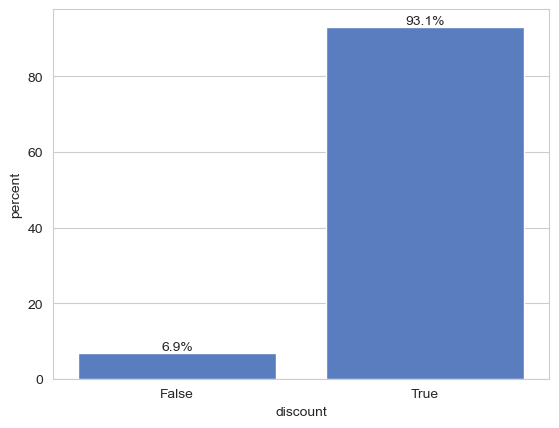

In [236]:
# 1. Считаем проценты
stats = master_df['discount'].value_counts(normalize=True).reset_index()
stats.columns = ['discount', 'percent']
stats['percent'] = stats['percent'] * 100

# 2. Строим график
ax = sns.barplot(data=stats, x='discount', y='percent')

# 3. Добавляем подписи
ax.bar_label(ax.containers[0], fmt='%.1f%%');

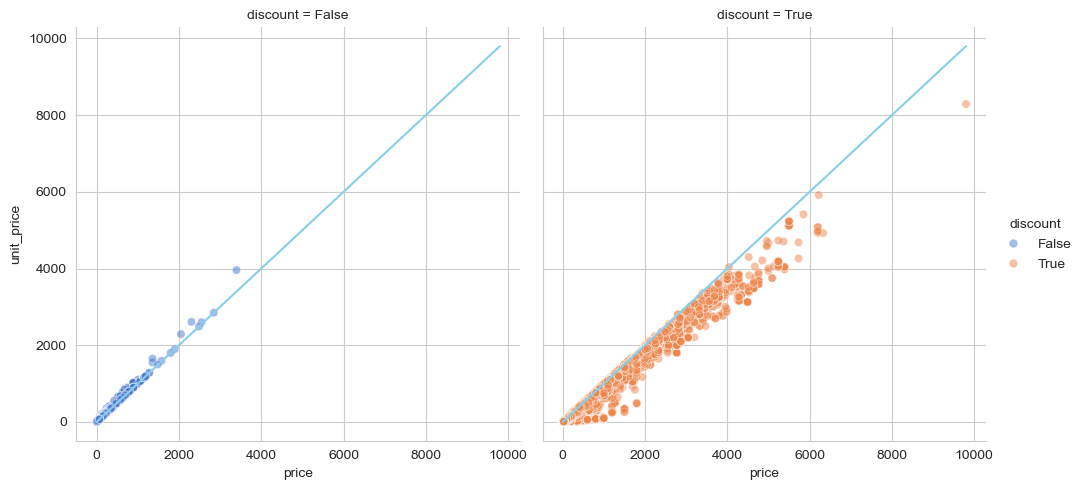

In [229]:
# Используем relplot для сравнения двух цен
g = sns.relplot(
    data=master_df,
    x="price",
    y="unit_price",
    hue="discount",
    col="discount", # Разделит на два графика: со скидкой и без
    alpha=0.5
)

# Добавляем диагональную линию (где цена == цене продажи) на оба графика
for ax in g.axes.flat:
    # Линия от 0 до максимальной цены в данных
    lims = [0, master_df['price'].max()]
    ax.plot(lims, lims, color='skyblue', linestyle='-', label='Original Price')

plt.show()

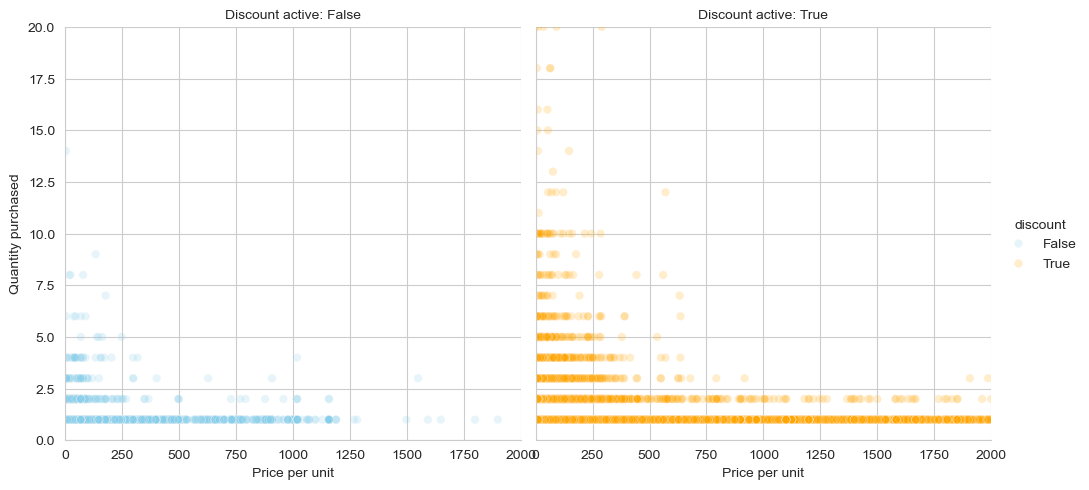

In [232]:
# Настраиваем стиль
sns.set_style("whitegrid")

# Строим график корреляции
g = sns.relplot(
    data=master_df,
    x="unit_price", 
    y="product_quantity",
    col="discount",        # Слева False (без скидки), справа True (со скидкой)
    hue="discount",
    kind="scatter",
    alpha=0.2,             # Точки станут прозрачными — будет видна плотность
    palette={True: 'orange', False: 'skyblue'}
)

# ОГРАНИЧИВАЕМ ОСИ, чтобы увидеть основную массу данных
# Подставьте свои значения (например, цена до 2000 и кол-во до 20)
g.set(xlim=(0, 2000), ylim=(0, 20))

# Добавляем понятные подписи
g.set_axis_labels("Price per unit", "Quantity purchased")
g.set_titles("Discount active: {col_name}");

Общая корреляция цены и объема продаж: -0.07


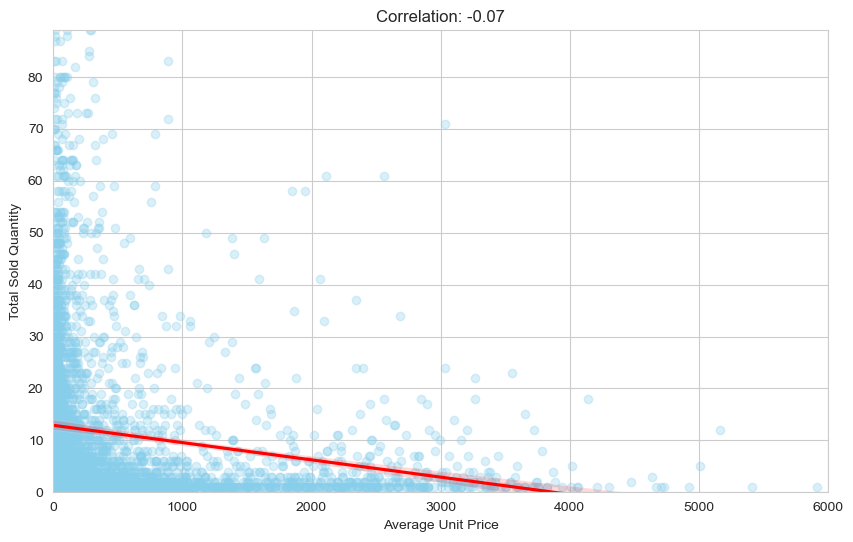

In [238]:
# 1. Группируем по товарам (sku)
# Считаем общее кол-во проданных штук и среднюю цену
products_total = master_df.groupby('sku').agg({
    'product_quantity': 'sum',
    'unit_price': 'mean'
}).reset_index()

# 2. Считаем числовую корреляцию (коэффициент Пирсона)
correlation_value = products_total['unit_price'].corr(products_total['product_quantity'])
print(f"Общая корреляция цены и объема продаж: {correlation_value:.2f}")

# 3. Строим красивый график в "золотом стандарте"
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(
    data=products_total, 
    x='unit_price', 
    y='product_quantity',
    scatter_kws={'alpha': 0.3, 'color': 'skyblue'}, # Прозрачность, чтобы видеть плотность
    line_kws={'color': 'red'}                       # Линия тренда
)

# Ограничиваем оси, чтобы выбросы не портили вид (настрой под свои данные)
plt.xlim(0, 6000) 
plt.ylim(0, products_total['product_quantity'].quantile(0.98)) # Отсекаем топ-2% аномальных продаж

plt.title(f'Correlation: {correlation_value:.2f}')
plt.xlabel('Average Unit Price')
plt.ylabel('Total Sold Quantity')
plt.show()

y = count sell
x = time

In [242]:
master_df

,order_id,date,sku,name,product_quantity,price,unit_price,total_price,state,category,long,short,type,discount,price_range
0,241423,2017-11-06,LAC0212,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,1,139.99,129.16,129.16,Completed,desktop components,LaCie,LAC,11935397,True,"(100, 200]"
1,242832,2017-12-31,PAR0074,Parrot 550mAh battery for MiniDrones,1,17.99,10.77,10.77,Completed,Other,Parrot,PAR,11905404,True,"(0, 50]"
2,243330,2017-02-15,OWC0074,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1,99.99,77.99,77.99,Completed,Other,OWC,OWC,1364,True,"(50, 100]"
3,245275,2017-06-28,TAD0007,Tado Smart Climate Control Intelligent AC,1,179.00,149.00,149.00,Completed,Other,Tado,TAD,11905404,True,"(100, 200]"
4,245595,2017-01-21,PAC1561,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",2,103.95,52.99,105.98,Completed,desktop components,Pack,PAC,11935397,True,"(50, 100]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60798,527042,2018-03-14,APP0927,EarPods Apple Headphones with Remote and Mic (...,1,35.00,13.99,13.99,Completed,Other,Apple,APP,5384,True,"(0, 50]"
60799,527070,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2,25.00,9.99,19.98,Completed,desktop components,Apple,APP,1230,True,"(0, 50]"
60800,527074,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2,25.00,9.99,19.98,Completed,desktop components,Apple,APP,1230,True,"(0, 50]"
60801,527096,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,3,25.00,9.99,29.97,Completed,desktop components,Apple,APP,1230,True,"(0, 50]"


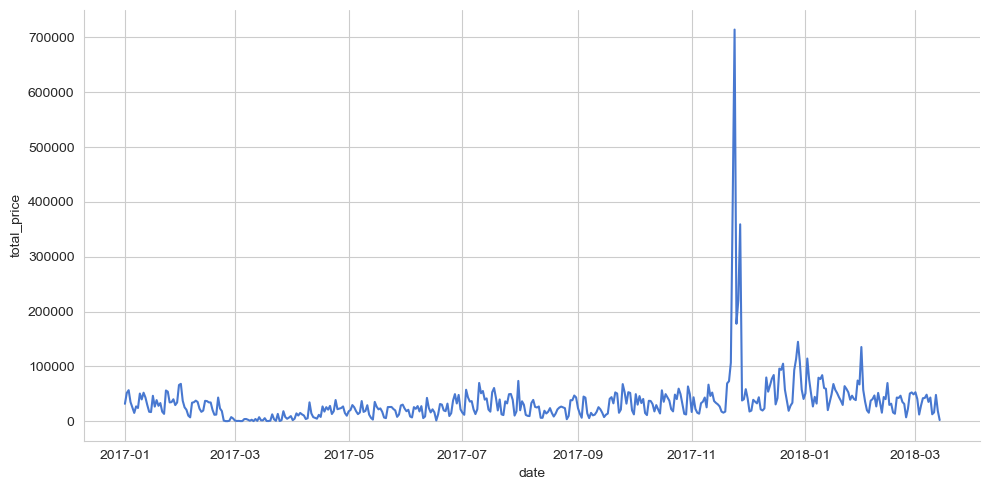

In [268]:
# total seasonality 
s_total = master_df.groupby("date").sum(numeric_only=True)
s_total_plot = s_total.reset_index()

sns.relplot(data=s_total_plot, x="date", y="total_price", kind="line", aspect=2);




In [271]:
# Black friday period
s_total.sort_values(by = 'total_price', ascending=False)

,order_id,product_quantity,price,unit_price,total_price,discount,moving_avg
date,,,,,,,
2017-11-24,959055010,2515,799232.14,675038.76,714194.42,2182,199424.62
2017-11-23,483318728,1296,438083.53,373642.19,400331.22,1114,99890.40
2017-11-27,594804399,1465,414455.83,340154.95,359018.68,1323,293065.12
2017-11-26,358588743,866,263175.07,215131.23,220675.80,805,251619.38
2017-11-25,287389966,741,196519.14,165137.79,177657.57,647,222590.82
...,...,...,...,...,...,...,...
2017-03-05,1328186,4,188.88,170.96,170.96,3,2088.71
2017-03-04,995944,3,189.99,150.97,150.97,3,2156.42
2017-03-11,334165,1,134.99,126.99,126.99,1,1996.06


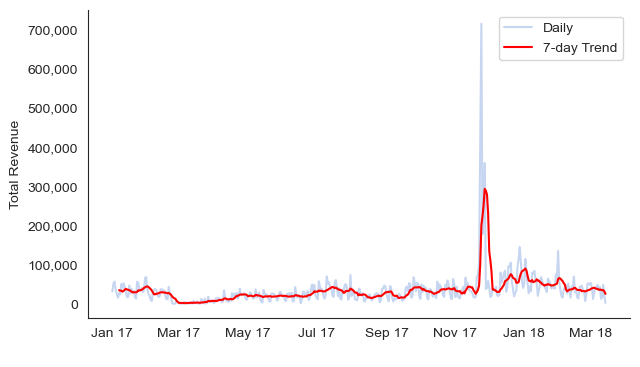

In [405]:
# среднее за 7 дней
s_total['moving_avg'] = s_total['total_price'].rolling(window=7).mean()

plt.figure(figsize=(7, 4))

# Устанавливаем стиль без сетки (белый фон)
sns.set_style("white") 

# Рисуем графики
sns.lineplot(data=s_total, x=s_total.index, y="total_price", alpha=0.3, label='Daily')
sns.lineplot(data=s_total, x=s_total.index, y="moving_avg", color='red', label='7-day Trend')

ax = plt.gca() 

# --- ОТКЛЮЧАЕМ СЕТКУ ---
ax.grid(False) 
# ----------------------

# Форматирование дат
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y')) 

# Форматирование тысяч через запятую
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel(" ")
plt.ylabel("Total Revenue")
plt.legend()

sns.despine()
plt.show()

In [293]:
# seasonality by category
# Используем .dt.to_period('M'), чтобы объединить все дни месяца
brands_s_total = master_df.groupby([master_df['date'].dt.to_period('M'), 'category'])['total_price'].sum().reset_index()

# Превращаем период обратно в дату для корректной работы графиков
brands_s_total['date'] = brands_s_total['date'].dt.to_timestamp()

brands_s_total


,date,category,total_price
0,2017-01-01,Other,182571.06
1,2017-01-01,accessories,22706.94
2,2017-01-01,desktop,346750.71
3,2017-01-01,desktop components,200174.06
4,2017-01-01,smartphone,35672.50
...,...,...,...
100,2018-03-01,desktop,106310.95
101,2018-03-01,desktop components,77010.94
102,2018-03-01,smartphone,26591.35
103,2018-03-01,smartphones accessories,5575.12


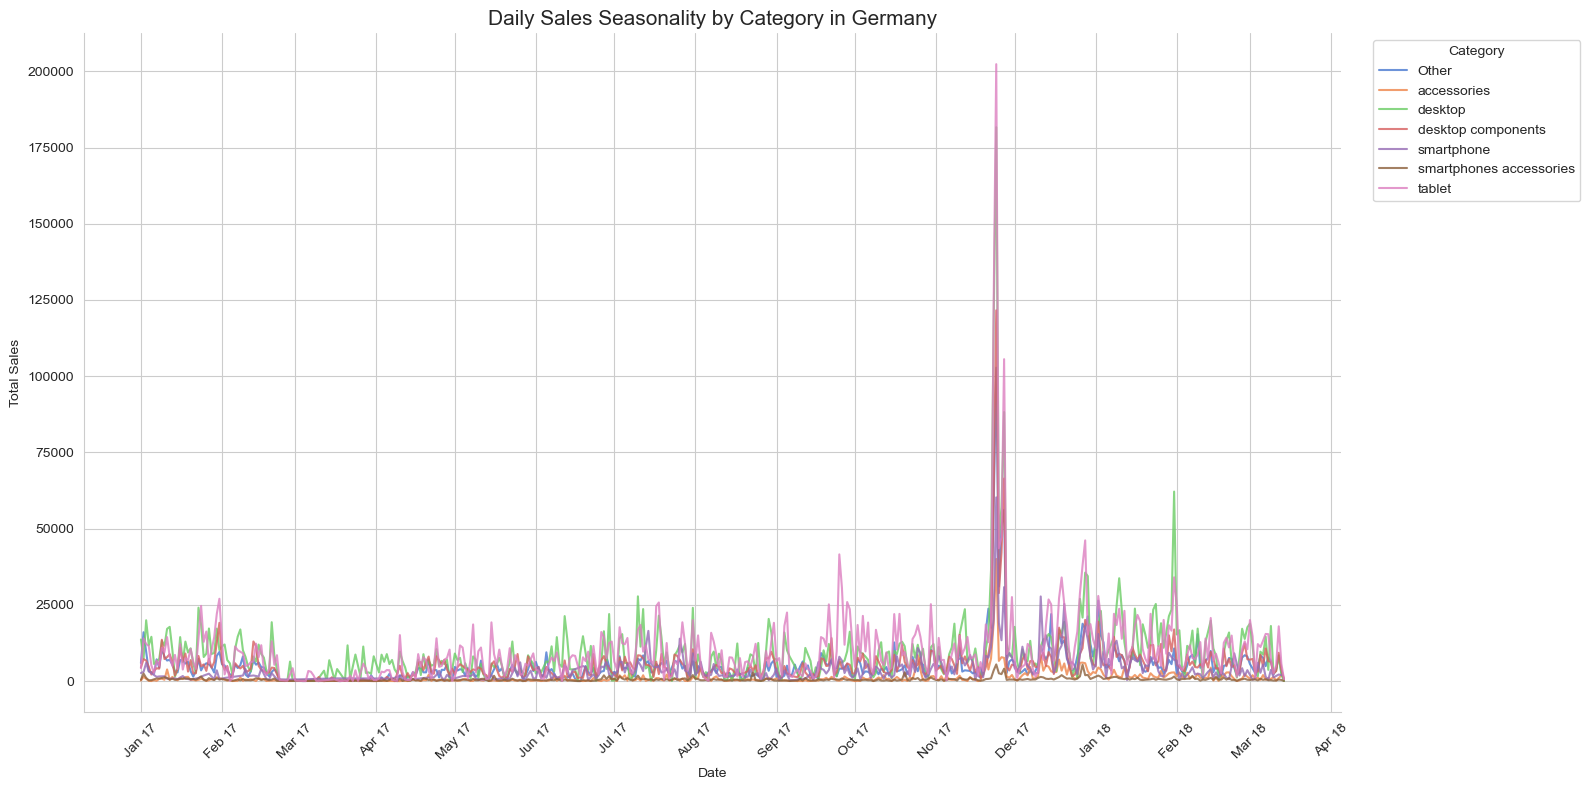

In [297]:

# 1. Группируем по дате и категории, чтобы получить сумму продаж в день
cat_seasonality = master_df.groupby(['date', 'category'])['total_price'].sum().reset_index()

# 2. Настраиваем размер и стиль
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

# 3. Рисуем график (hue разделит по цветам)
sns.lineplot(data=cat_seasonality, x='date', y='total_price', hue='category', linewidth=1.5, alpha=0.8)

# 4. Настраиваем ось X, чтобы видеть КАЖДЫЙ месяц
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

# Оформление
plt.xticks(rotation=45)
plt.title("Daily Sales Seasonality by Category in Germany", fontsize=15)
plt.legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left') # Вынос легенды, чтобы не мешала
plt.ylabel("Total Sales")
plt.xlabel("Date")

sns.despine()
plt.tight_layout()
plt.show()

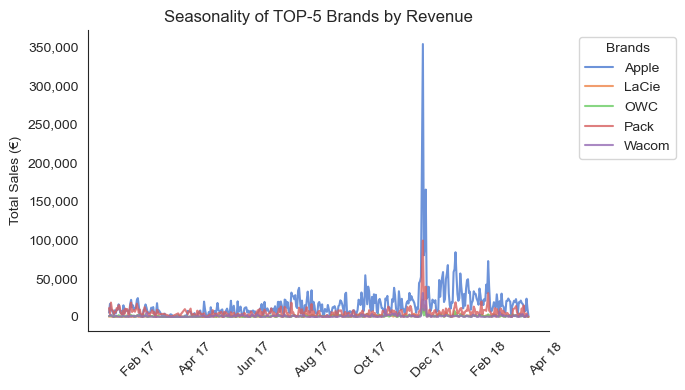

In [368]:
# 1. Находим список ТОП-5 брендов по общей выручке
top_5_brands = master_df.groupby('long')['total_price'].sum().nlargest(5).index

# 2. Фильтруем данные
brands_seasonality = master_df[master_df['long'].isin(top_5_brands)]

# 3. Группируем по дате и бренду
brands_seasonality = brands_seasonality.groupby(['date', 'long'])['total_price'].sum().reset_index()

# --- Визуализация ---
plt.figure(figsize=(7, 4))
sns.set_style("white") # Убираем лишнюю сетку для чистоты

# Рисуем график
sns.lineplot(data=brands_seasonality, x='date', y='total_price', hue='long', linewidth=1.5, alpha=0.8)

# Настройка осей
ax = plt.gca()

# Красивая ось X (раз в 2 месяца, чтобы не было каши из подписей)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

# Наш профессиональный формат для оси Y с запятыми
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title("Seasonality of TOP-5 Brands by Revenue", fontsize=12)
plt.legend(title='Brands', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Total Sales (€)")
plt.xlabel("") # Убираем "Date", так как по формату дат и так всё понятно

plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

In [353]:
master_df.loc[master_df['long'] == 'Apple', :].sort_values(by = 'total_price', ascending=False).head(20)

,order_id,date,sku,name,product_quantity,price,unit_price,discount_percentage,total_price,state,category,long,short,type
36308,437633,2017-11-24,APP1003,"Apple MacBook Pro Retina 15 ""i7 22 Ghz | RAM 1...",3,2489.00,2275.60,8.57,6826.80,Completed,tablet,Apple,APP,1282
15545,365521,2017-07-12,APP2233,"Apple iMac 27 ""Core i7 Retina 5K 42GHz | 8GB |...",2,3559.00,3349.00,5.90,6698.00,Completed,desktop,Apple,APP,"5,74E+15"
59032,519356,2018-03-01,APP2075,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29Ghz ...",2,3305.59,2999.00,9.27,5998.00,Completed,tablet,Apple,APP,"1,02E+12"
28585,411307,2017-10-11,APP2089,"Apple iMac 27 ""Core i5 3.4Ghz 5K Retina | 8GB ...",3,2105.59,1985.60,5.70,5956.80,Completed,desktop,Apple,APP,"5,74E+15"
53609,499436,2018-01-28,APP2677,"Apple iMac Pro 27 ""8-core Intel Xeon W 32GHz |...",1,6219.00,5917.00,4.86,5917.00,Completed,desktop,Apple,APP,118692158
46964,474827,2017-12-28,APP2231,"Apple iMac 27 ""Core i7 Retina 5K 42GHz | 8GB |...",2,3079.00,2866.59,6.90,5733.18,Completed,desktop,Apple,APP,"5,74E+15"
24372,394981,2017-08-31,APP2365,"Apple Macbook Pro 13 ""Core i5 2.3GHz | 8GB | 5...",3,1999.00,1905.59,4.67,5716.77,Completed,tablet,Apple,APP,"1,02E+12"
54927,504010,2018-02-01,APP2637,"Apple iMac Pro 27 ""8-core Intel Xeon W 32GHz |...",1,5499.00,5230.64,4.88,5230.64,Completed,desktop,Apple,APP,118692158
56974,511836,2018-02-15,APP2637,"Apple iMac Pro 27 ""8-core Intel Xeon W 32GHz |...",1,5499.00,5230.64,4.88,5230.64,Completed,desktop,Apple,APP,118692158
58475,517407,2018-02-25,APP2637,"Apple iMac Pro 27 ""8-core Intel Xeon W 32GHz |...",1,5499.00,5229.00,4.91,5229.00,Completed,desktop,Apple,APP,118692158


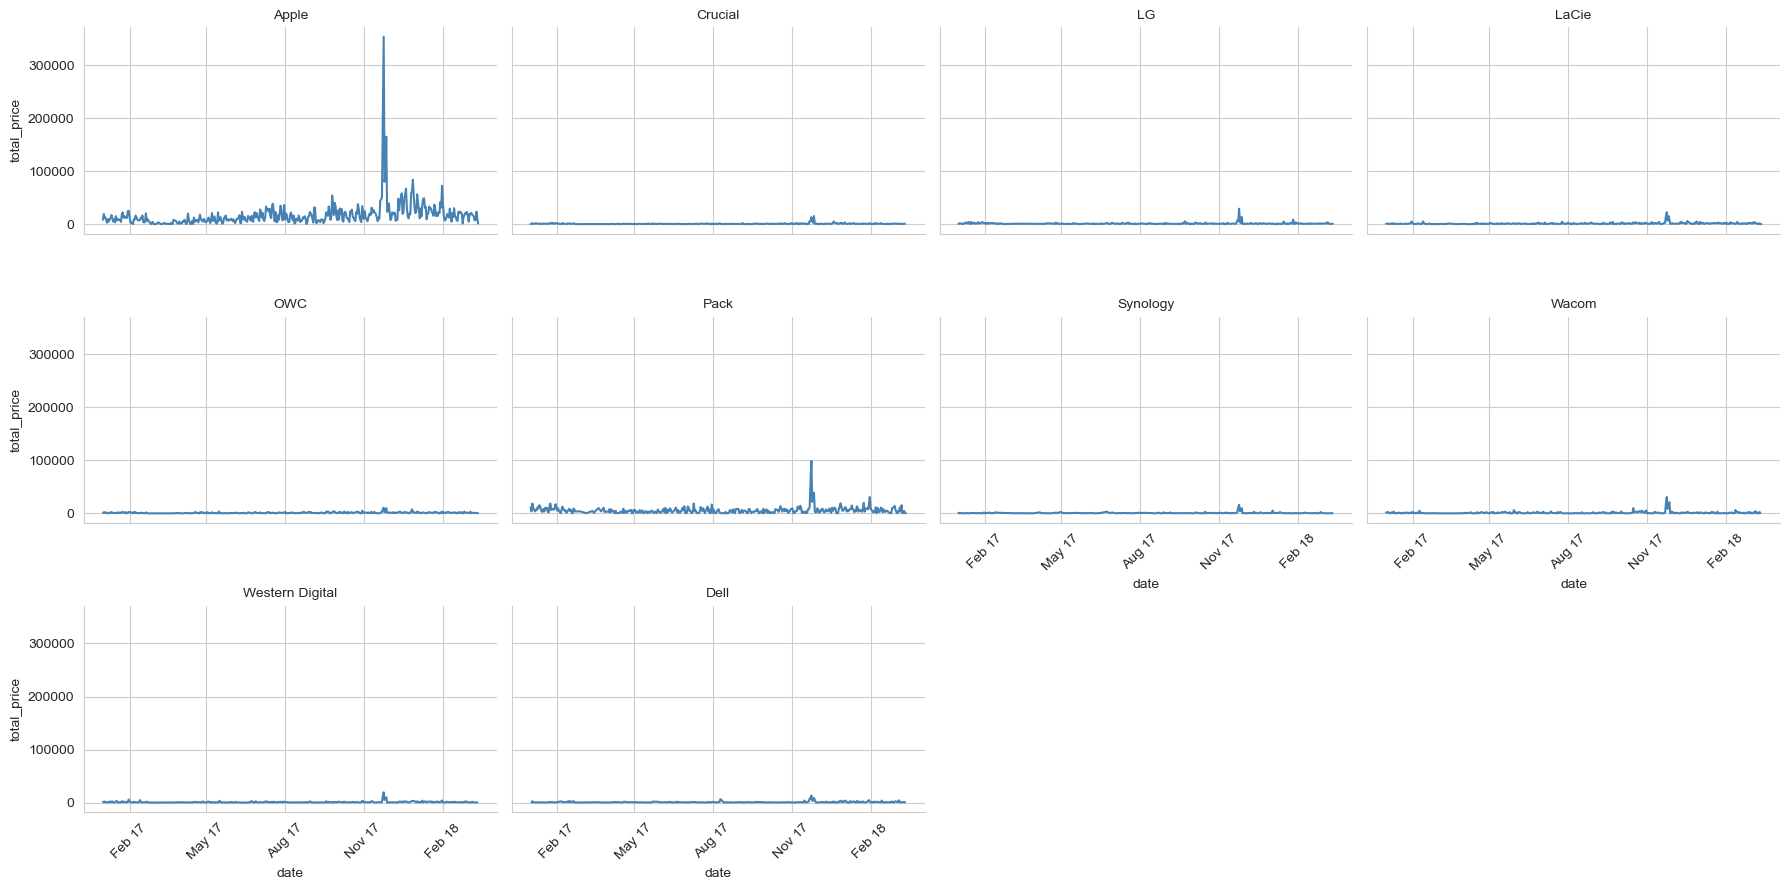

In [303]:
# Используем relplot для создания сетки (FacetGrid)
g = sns.relplot(
    data=brands_seasonality, 
    x="date", 
    y="total_price", 
    col="long",       # Создает отдельный график для каждого бренда
    col_wrap=4,       # По 4 графика в ряд
    kind="line", 
    height=3, 
    aspect=1.5,
    color="steelblue" # Один спокойный цвет для всех, так как названия в заголовках
)

# Настройка осей для каждого подграфика
for ax in g.axes.flat:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # Раз в 3 месяца, чтобы не теснились
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
    plt.setp(ax.get_xticklabels(), rotation=45)

g.set_titles("{col_name}") # Оставляем только название бренда в заголовке
plt.tight_layout()
plt.show()

In [318]:
master_df['discount_percentage'] = 100 - (master_df['unit_price'] / master_df['price']) * 100

In [319]:
print(master_df[['unit_price', 'price', 'discount_percentage']].head())

   unit_price  price  discount_percentage
0      129.16 139.99                 7.74
1       10.77  17.99                40.13
2       77.99  99.99                22.00
3      149.00 179.00                16.76
4       52.99 103.95                49.02


In [ ]:
new_order3 = ['order_id', 'date', 'sku', 'name', 'product_quantity', 'price' ,'unit_price', 'discount_percentage' ,'total_price', 'state', 'category', 'long',  'short', 'type'] 
master_df = master_df[new_order3]

master_df


,order_id,date,sku,name,product_quantity,price,unit_price,discount_percentage,total_price,state,category,long,short,type
0,241423,2017-11-06,LAC0212,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,1,139.99,129.16,7.74,129.16,Completed,desktop components,LaCie,LAC,11935397
1,242832,2017-12-31,PAR0074,Parrot 550mAh battery for MiniDrones,1,17.99,10.77,40.13,10.77,Completed,Other,Parrot,PAR,11905404
2,243330,2017-02-15,OWC0074,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1,99.99,77.99,22.00,77.99,Completed,Other,OWC,OWC,1364
3,245275,2017-06-28,TAD0007,Tado Smart Climate Control Intelligent AC,1,179.00,149.00,16.76,149.00,Completed,Other,Tado,TAD,11905404
4,245595,2017-01-21,PAC1561,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",2,103.95,52.99,49.02,105.98,Completed,desktop components,Pack,PAC,11935397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60798,527042,2018-03-14,APP0927,EarPods Apple Headphones with Remote and Mic (...,1,35.00,13.99,60.03,13.99,Completed,Other,Apple,APP,5384
60799,527070,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2,25.00,9.99,60.04,19.98,Completed,desktop components,Apple,APP,1230
60800,527074,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2,25.00,9.99,60.04,19.98,Completed,desktop components,Apple,APP,1230
60801,527096,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,3,25.00,9.99,60.04,29.97,Completed,desktop components,Apple,APP,1230


In [323]:
# Оставляем только реалистичные скидки от 0 до 100%
master_df = master_df[(master_df['discount_percentage'] >= 0) & (master_df['discount_percentage'] <= 100)]

In [328]:
# Discounts vs. Revenue Correlation 

correlation_df = master_df.groupby('date').agg({
    'total_price': 'sum',
    'discount_percentage': 'mean'
}).reset_index()

correlation_df.head()
correlation_df.describe()


,date,total_price,discount_percentage
count,438,438.00,438.00
mean,2017-08-07 12:00:00.000000256,33456.98,20.83
min,2017-01-01 00:00:00,32.99,5.72
25%,2017-04-20 06:00:00,14213.64,17.72
50%,2017-08-07 12:00:00,25552.70,20.13
75%,2017-11-24 18:00:00,41750.67,22.72
max,2018-03-14 00:00:00,711595.00,60.84
std,NaN,47111.61,5.77


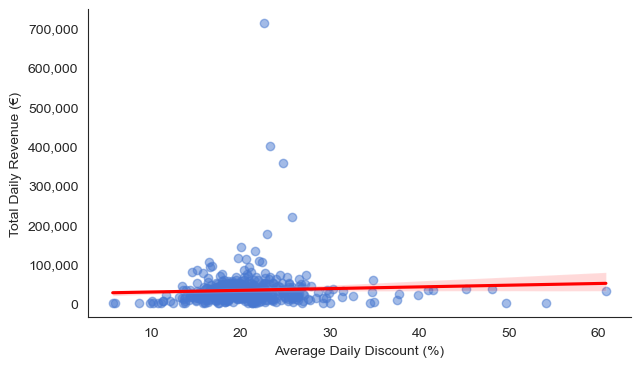

In [ ]:
plt.figure(figsize=(7, 4))

# Рисуем график регрессии
sns.regplot(data=correlation_df, x='discount_percentage', y='total_price', 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Захватываем оси для настройки
ax = plt.gca()

# Форматируем ось Y: добавляем запятую как разделитель тысяч (700,000)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


plt.xlabel('Average Daily Discount (%)')
plt.ylabel('Total Daily Revenue (€)')

# Настройка сетки и рамок

sns.despine() # Убираем верхнюю и правую рамки для чистоты

plt.show()

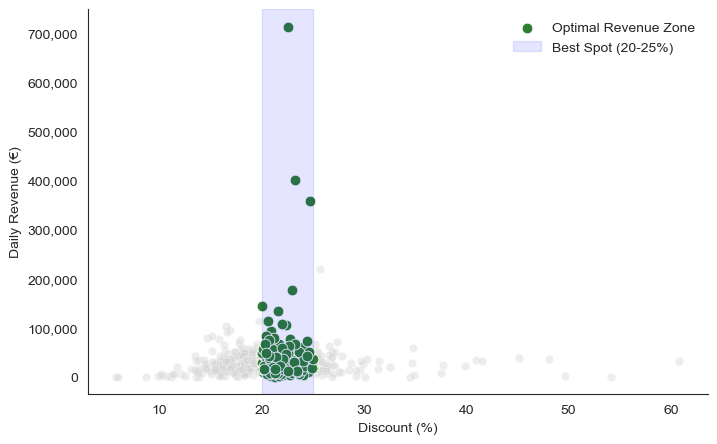

In [409]:
plt.figure(figsize=(8, 5))

# Разделяем данные на "эффективные" и остальные для разного цвета
sweet_spot = (correlation_df['discount_percentage'] >= 20) & (correlation_df['discount_percentage'] <= 25)

# Рисуем серые точки (фон)
sns.scatterplot(data=correlation_df[~sweet_spot], x='discount_percentage', y='total_price', 
                color='lightgrey', alpha=0.4)

# Рисуем акцентные точки (результат)
sns.scatterplot(data=correlation_df[sweet_spot], x='discount_percentage', y='total_price', 
                color='#2E7D32', s=60, label='Optimal Revenue Zone')

# Подсвечиваем зону 20-25% фоном
plt.axvspan(20, 25, color='Blue', alpha=0.1, label='Best Spot (20-25%)')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Убираем лишнее
plt.xlabel('Discount (%)')
plt.ylabel('Daily Revenue (€)')
plt.legend(frameon=False)
sns.despine()
plt.grid(False) # Как ты просил ранее, убираем сетку

plt.show()

In [369]:
# Discount across the year

master_df

,order_id,date,sku,name,product_quantity,price,unit_price,discount_percentage,total_price,state,category,long,short,type
0,241423,2017-11-06,LAC0212,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,1,139.99,129.16,7.74,129.16,Completed,desktop components,LaCie,LAC,11935397
1,242832,2017-12-31,PAR0074,Parrot 550mAh battery for MiniDrones,1,17.99,10.77,40.13,10.77,Completed,Other,Parrot,PAR,11905404
2,243330,2017-02-15,OWC0074,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1,99.99,77.99,22.00,77.99,Completed,Other,OWC,OWC,1364
3,245275,2017-06-28,TAD0007,Tado Smart Climate Control Intelligent AC,1,179.00,149.00,16.76,149.00,Completed,Other,Tado,TAD,11905404
4,245595,2017-01-21,PAC1561,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",2,103.95,52.99,49.02,105.98,Completed,desktop components,Pack,PAC,11935397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60798,527042,2018-03-14,APP0927,EarPods Apple Headphones with Remote and Mic (...,1,35.00,13.99,60.03,13.99,Completed,Other,Apple,APP,5384
60799,527070,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2,25.00,9.99,60.04,19.98,Completed,desktop components,Apple,APP,1230
60800,527074,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2,25.00,9.99,60.04,19.98,Completed,desktop components,Apple,APP,1230
60801,527096,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,3,25.00,9.99,60.04,29.97,Completed,desktop components,Apple,APP,1230


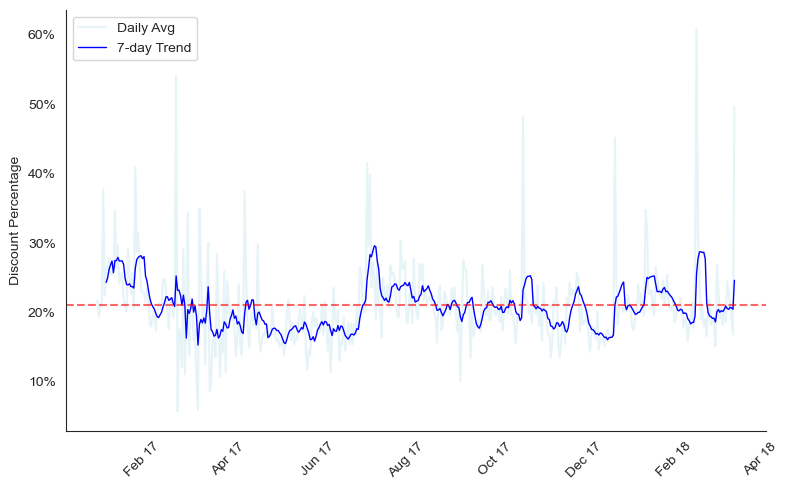

In [406]:
# avg discount across the year

# 1. Считаем среднее по дням и добавляем скользящее среднее для сглаживания
disc_perc_daily = master_df.groupby('date')['discount_percentage'].mean().reset_index()
disc_perc_daily['moving_avg'] = disc_perc_daily['discount_percentage'].rolling(window=7).mean()

plt.figure(figsize=(8, 5))
sns.set_style("white")

# 2. Рисуем основной график (светлым) и тренд (ярким)
sns.lineplot(data=disc_perc_daily, x='date', y='discount_percentage', alpha=0.3, color='lightblue', label='Daily Avg')
sns.lineplot(data=disc_perc_daily, x='date', y='moving_avg', color='blue', linewidth=1, label='7-day Trend')

# 3. Добавляем горизонтальную линию среднего значения (21%)
plt.axhline(y=21, color='red', linestyle='--', alpha=0.6, label='Overall Avg (21%)')

# 4. Настройка осей
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}%'))

plt.ylabel("Discount Percentage")
plt.xlabel("")


sns.despine() # Убираем верхнюю и правую рамки для чистоты

plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()